
# **Introduction**

A stock is the small chunk of ownership in the company. The stock price of the company reflects the net evaluation of the company and also gives a little insight into its performance. These stocks are traded on exchanges and their prices are constantly changing due to their demand and supply in the market. If a stock is in high demand and low in supply i.e. more people want to buy it and fewer people are willing to sell it then the price for the stock will go up and similarly if the stock is in low demand and high on supply which means people more people are ready to sell it but fewer people are willing to buy it then its prices go down.

The sudden increase in the demand for the stock can be due to various reasons including positive news about the company or an announcement from the company. After a period of time when the demand for the stock vanishes its prices slowly creep down as the investor loses interest in it. These stock prices going up and down is an iterative process and repeated. This volatility of stock makes investors nervous while investing in a company. So to understand the risk associated with it there must be a proper analysis of stock before buying it.

For Model Building I took **Apple Inc.** Share Report from *Jan 1,1980 - Jan 18, 2022*.

# **Description about Apple Inc.**

Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience with on-demand radio stations; Apple News+, a subscription news and magazine service; Apple TV+, which offers exclusive original content; Apple Card, a co-branded credit card; and Apple Pay, a cashless payment service, as well as licenses its intellectual property. The company serves consumers, and small and mid-sized businesses; and the education, enterprise, and government markets. It distributes third-party applications for its products through the App Store. The company also sells its products through its retail and online stores, and direct sales force; and third-party cellular network carriers, wholesalers, retailers, and resellers. Apple Inc. was incorporated in 1977 and is headquartered in Cupertino, California.

For more Information: https://www.apple.com

## **Data description**:
I have downloaded the daily stock prices data from https://finance.yahoo.com/quote/AAPL?p=AAPL. It’s a five-year data capturing Open, High, Low, Close, and Volume

* Open: The price of the stock when the market opens in the morning
* Close: The price of the stock when the market closed in the evening
* High: Highest price the stock reached during that day
* Low: Lowest price the stock is traded on that day
* Volume: The total amount of stocks traded on that day

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense


In [2]:
data = pd.read_csv('AAPL.csv')
data.shape

(10349, 7)

In [3]:
def info(data) :
        # Basic Information about the dataset
        data.info()

        # Dimensions of dataset
        print('Shape of The dataset: ', data.shape)
        print('Total Size of the dataset: ', data.size)
        print('Dimensions of dataset: ', data.ndim)


        # Descriptive Statistics of Numerical Columns
        num_des = pd.DataFrame(data.describe())
        print('\nExporting')
        print('Descriptive Statistical Report for Numerical Columns')
        num_des.to_excel('Statistical Report.xlsx')


        # Quantify the Numerical Columns and Categorical Columns
        num_cols = data.select_dtypes(include = ['int64', 'int32', 'int16','float64', 'float32', 'float16']).columns
        print('\nNumerical Columns: ', num_cols.values)
        print('Number of Numerical Columns in the dataset: ', num_cols.nunique())

        cat_cols = data.select_dtypes(include = ['object', 'category']).columns
        print('\nCategorical Columns: ', cat_cols.values)
        print('Number of Categorical Columns in the dataset: ', cat_cols.nunique())


        # Quantifying Percentage of Missing Values in the dataset
        Null = pd.DataFrame(round(data.isnull().mean() * 100 , 2), columns = ['Percentage'])
        print('\n\nPercentage of Null Values in the dataset: \n',Null)

        # Determining Cardinality
        cardinality = pd.DataFrame(data.nunique(), columns= ['Counts'])
        print('\n\nCardinality: \n', cardinality)
        
info(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10349 entries, 0 to 10348
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10349 non-null  object 
 1   Open       10349 non-null  float64
 2   High       10349 non-null  float64
 3   Low        10349 non-null  float64
 4   Close      10349 non-null  float64
 5   Adj Close  10349 non-null  float64
 6   Volume     10349 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 566.1+ KB
Shape of The dataset:  (10349, 7)
Total Size of the dataset:  72443
Dimensions of dataset:  2

Exporting
Descriptive Statistical Report for Numerical Columns

Numerical Columns:  ['Open' 'High' 'Low' 'Close' 'Adj Close' 'Volume']
Number of Numerical Columns in the dataset:  6

Categorical Columns:  ['Date']
Number of Categorical Columns in the dataset:  1


Percentage of Null Values in the dataset: 
            Percentage
Date              0.0
Open              0.

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1981-01-02,0.154018,0.155134,0.154018,0.154018,0.120545,21660800
1,1981-01-05,0.151228,0.151228,0.150670,0.150670,0.117924,35728000
2,1981-01-06,0.144531,0.144531,0.143973,0.143973,0.112683,45158400
3,1981-01-07,0.138393,0.138393,0.137835,0.137835,0.107879,55686400
4,1981-01-08,0.135603,0.135603,0.135045,0.135045,0.105695,39827200


**Exploratory Data Analysis**

In [5]:
data["Date"] = pd.to_datetime(data['Date'])
data['Date'].dtype

data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Quarter'] = data['Date'].dt.quarter

1) Comparison on Opening and Closing Prices of Stocks over a period of time?

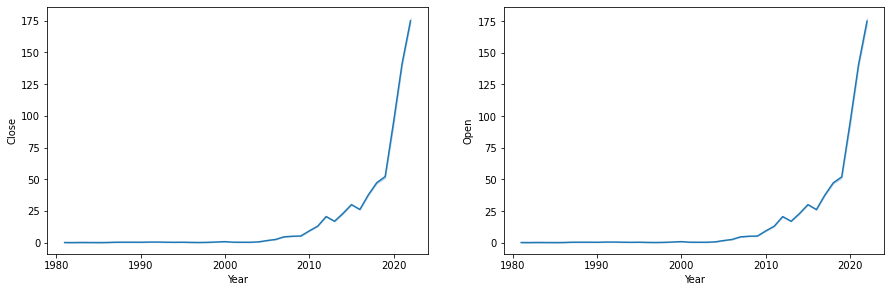

In [6]:
plt.figure(figsize= (15,10))
plt.subplot(2,2,1)
sns.lineplot(data = data, x = 'Year', y = 'Close')
plt.subplot(2,2,2)
sns.lineplot(data = data, x = 'Year', y = 'Open');

2) Spreading of Volumes of Shares over a year?

Text(0.5, 1.0, 'Volume of Stocks Traded over a period')

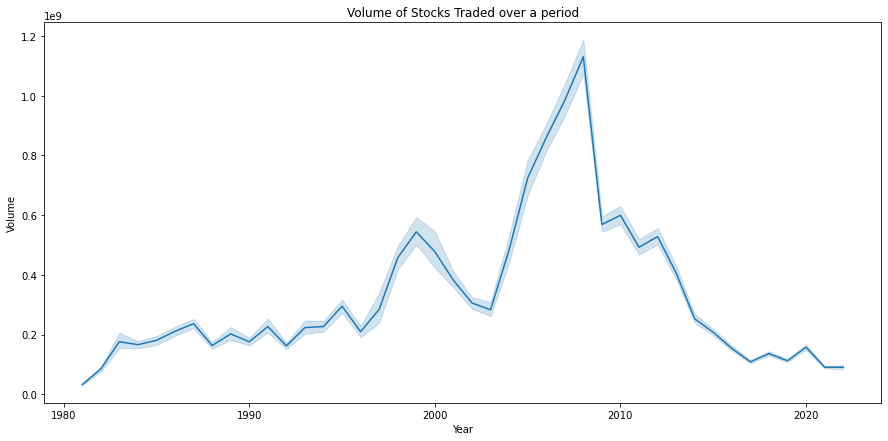

In [7]:
plt.figure(figsize  = (15,7))
sns.lineplot(data = data, x = 'Year', y = 'Volume')
plt.title('Volume of Stocks Traded over a period')

3) Accumulated Volumes over Quarter in Year?

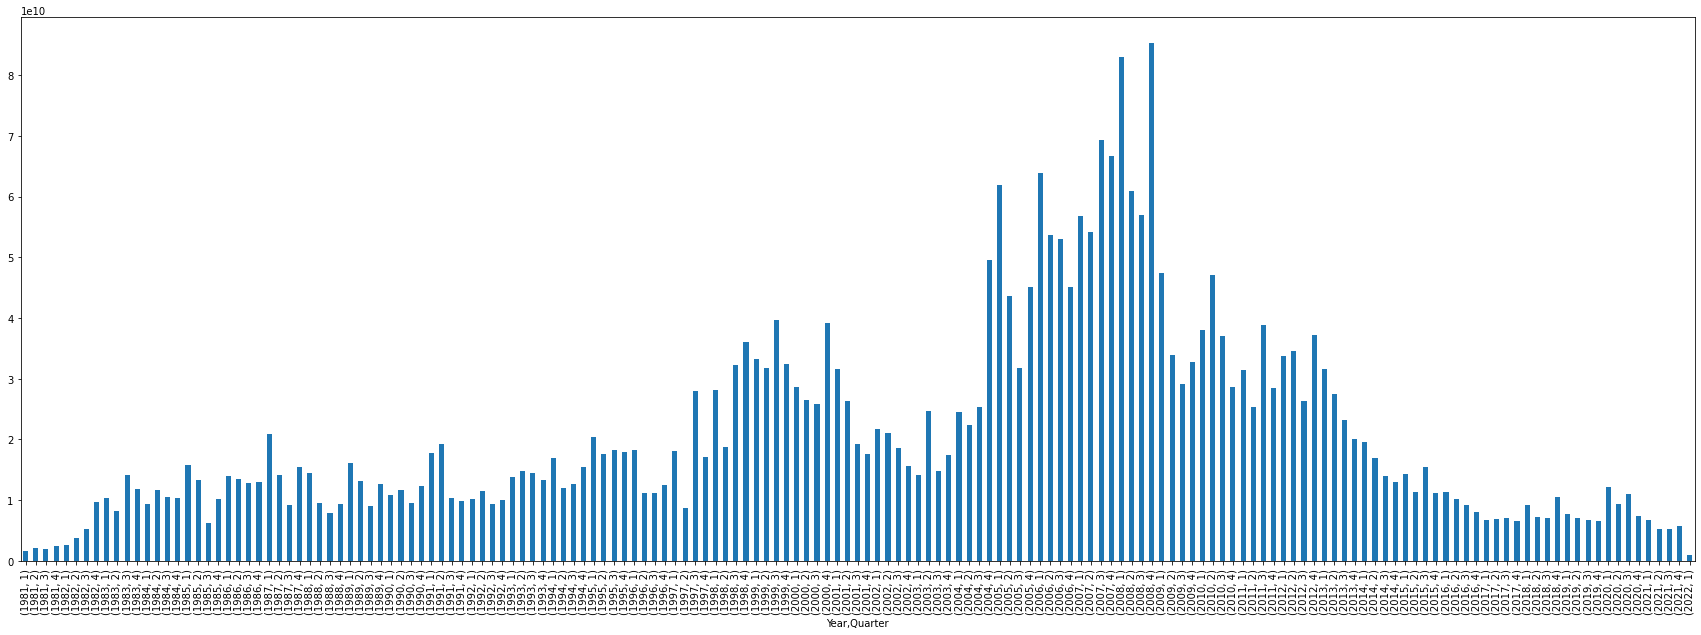

In [8]:
plt.figure(figsize= (30,10))
res = data.groupby(['Year','Quarter'])['Volume'].sum()
res.plot.bar();

4) Analyse the **Apple Market Capitalization**?

*Market Capitalization*:

Market capitalization refers to the total dollar market value of a company's outstanding shares of stock.

Text(0.5, 1.0, 'Trend of Market Capitalization of Apple Inc.')

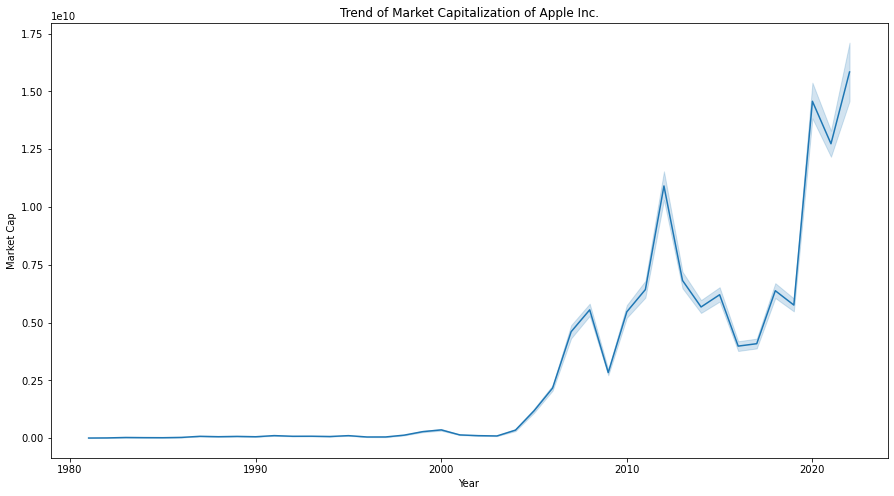

In [9]:
plt.figure(figsize= (15,8))
data['Market Cap'] = data['Open'] * data['Volume']
sns.lineplot(data = data, x = 'Year', y = 'Market Cap')
plt.title('Trend of Market Capitalization of Apple Inc.')

**Moving Average**

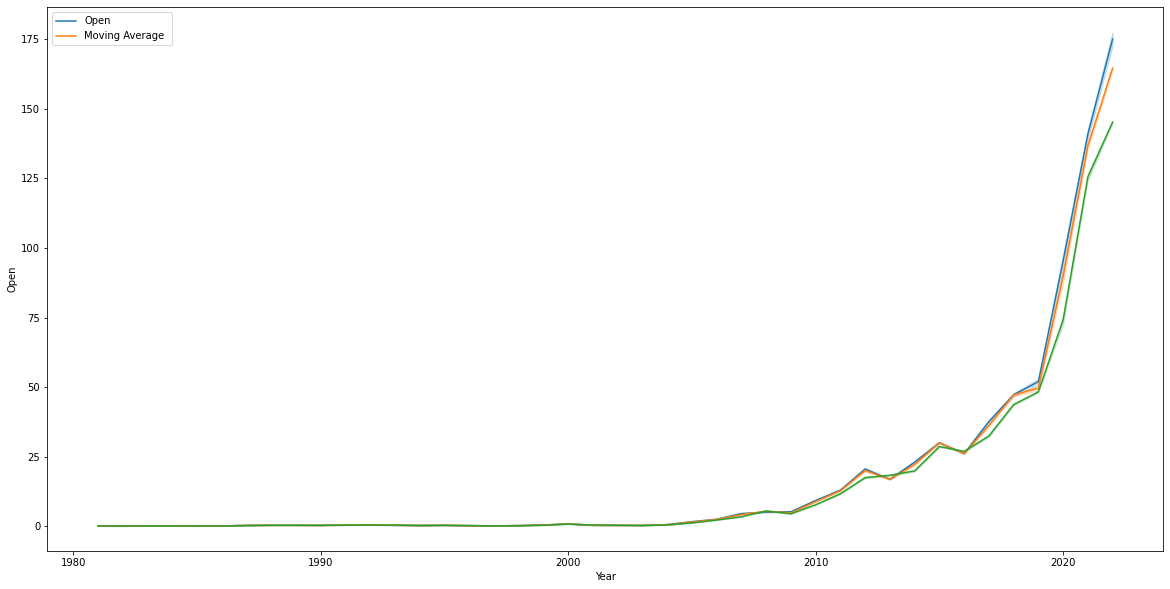

In [10]:
plt.figure(figsize= (20,10))
data['MA50'] = data['Open'].rolling(50).mean()
data['MA200'] = data['Open'].rolling(200).mean()
sns.lineplot(data = data, x = 'Year', y = 'Open', label = 'Open')
sns.lineplot(data = data, x = 'Year', y = 'MA50', label = 'Moving Average ')
sns.lineplot(data = data, x = 'Year', y = 'MA200')
plt.legend();

**Percentage Increase in Stock Prices - Return Deviation**

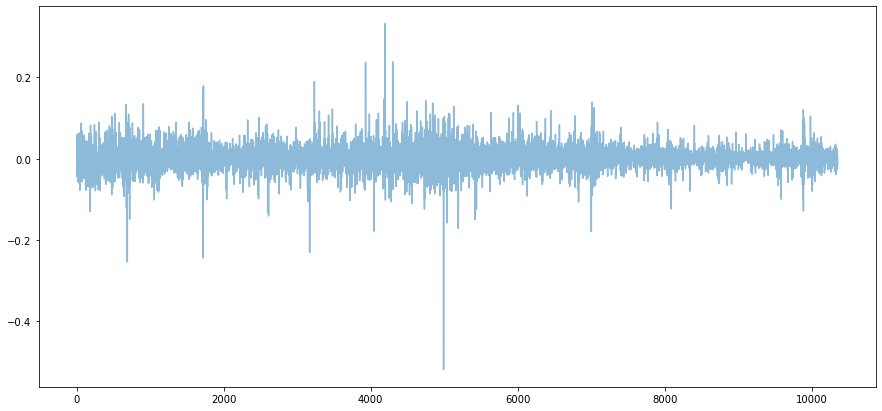

In [11]:
data['Returns'] = (data['Close']/data['Close'].shift(1)) - 1
data['Returns'].plot.line(label = 'Apple', alpha = 0.5, figsize = (15,7));

Logically, our ideal stocks should return as high and stable as possible. Because the deviation is clinging over 0.1 to 0.2 in either ways, so investment won't be lost.

In [12]:
data['HL_Change'] = (data['High'] - data['Low']) / data['Close'] * 100
data['PCT_Change'] = (data['Close'] - data['Open']) / data['Open'] *100

<AxesSubplot:>

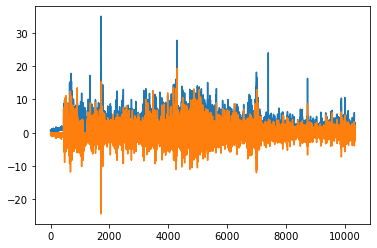

In [13]:
data['HL_Change'].plot.line()
data['PCT_Change'].plot.line()

**Model Building**

Since it is Follows a time Flow, I break the Dataset into train test by own choice

* Here my choice of Breaking is it contains a data from 1981 - 2022.
so I will segement data into train and test as shape of 9000 as train and remaining as test data.


<AxesSubplot:>

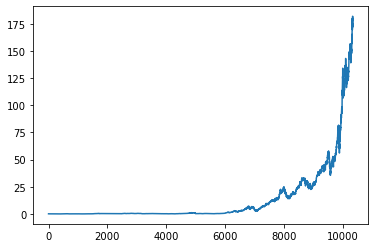

In [14]:
data = data.Close
data.plot.line()

**Feature Scaling**

In [15]:
scale = MinMaxScaler()
data = scale.fit_transform(data.values.reshape(-1,1))

**Splitting dataset into Train and Test data**

In [16]:
train = int(len(data) * 0.7)
test = len(data) - train

train, test = data[0:train], data[train:]

In [17]:
print('Train Data Shape: ',train.shape)
print('Test Data Shape: ',test.shape)

Train Data Shape:  (7244, 1)
Test Data Shape:  (3105, 1)


In [18]:
def create_dataset(dataset, time_step = 1):
    data_x, data_y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i: (i + time_step), 0]
        data_x.append(a)
        data_y.append(dataset[i + time_step, 0])
        return np.array(data_x), np.array(data_y)
    
time_step = 100
x_train, y_train = create_dataset(train, time_step)
x_test, y_test = create_dataset(test, time_step)

In [19]:
x_train.shape, y_train.shape

((1, 100), (1,))

In [20]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [21]:
x_train.shape

(1, 100, 1)

**LSTM Model**

In [22]:
model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences= True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [23]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

train_predict = scale.inverse_transform(train_predict)
test_predict = scale.inverse_transform(test_predict)

In [24]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_train, train_predict))

0.05063097201918714